# Cancer Classification

#### Project Goal : To Predict which type of tumor(Malignent or Benign) a patient is more likely suffering .

##### A tumor is a group of abnormal cells. Depending on the type of cells within the tumor it can be classified into three types namely :
- Benign : Does not contain cancerous cells, but could be dangerous if grown near the vital organs.
- Malignant : Contains cancerous cells.
- Premalignant : Potential to become cancerous cells.

##### So, the purpose of the analysis is to identify features which can significantly differentiate whether a tumor is Benign or Malignant.  So, implemented Logistic regression to initially differentiate whether the tumor is of which type and then implemented different feature selection methods to get the most important features which are useful to classify.

## Importing Required Libraries

In [238]:
#Data Manipulation
import numpy as np 
import pandas as pd
from statistics import mean

#Data Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Data Visualization
import scikitplot as skplt
from matplotlib import pyplot as plt
import seaborn as sns

#Model Evaluation Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve

#Cross Validation
from sklearn.model_selection import KFold, cross_val_score

#Feature Selection Techniques
from sklearn.feature_selection import SelectKBest, f_classif, RFE, chi2

#Ignores warnings
import warnings
warnings.filterwarnings("ignore")

## Reading data

##### The Source of the dataset is Kaggle. The datset consists of 569 records and 31 features(of which 30 are independent and 1 is dependent variable).  

In [3]:
cancer_data = pd.read_csv('cancer_dataset.csv')
cancer_data = cancer_data.iloc[:, :-1]
cancer_data = cancer_data.iloc[:, 1:]

In [4]:
cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
cancer_data.shape

(569, 31)

##### Checking for Null values. The Dataset is clean.  

In [6]:
cancer_data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Class distribution of the Target Variable.

##### As this is a binary classification checking the ratio of classes and from below it does not seem as an imbalanced dataset.

In [7]:
cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

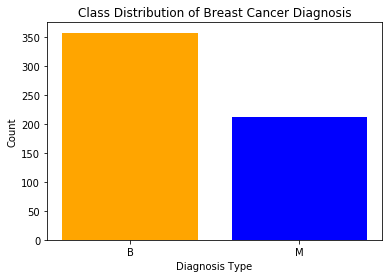

In [8]:
plt.bar(x = cancer_data['diagnosis'].value_counts().index, height = cancer_data['diagnosis'].value_counts(), color = ['orange','blue'])
plt.title('Class Distribution of Breast Cancer Diagnosis')
plt.xlabel('Diagnosis Type')
plt.ylabel('Count')
plt.show()

### Correlation plot

##### To check whether any of the features are highly correlated.

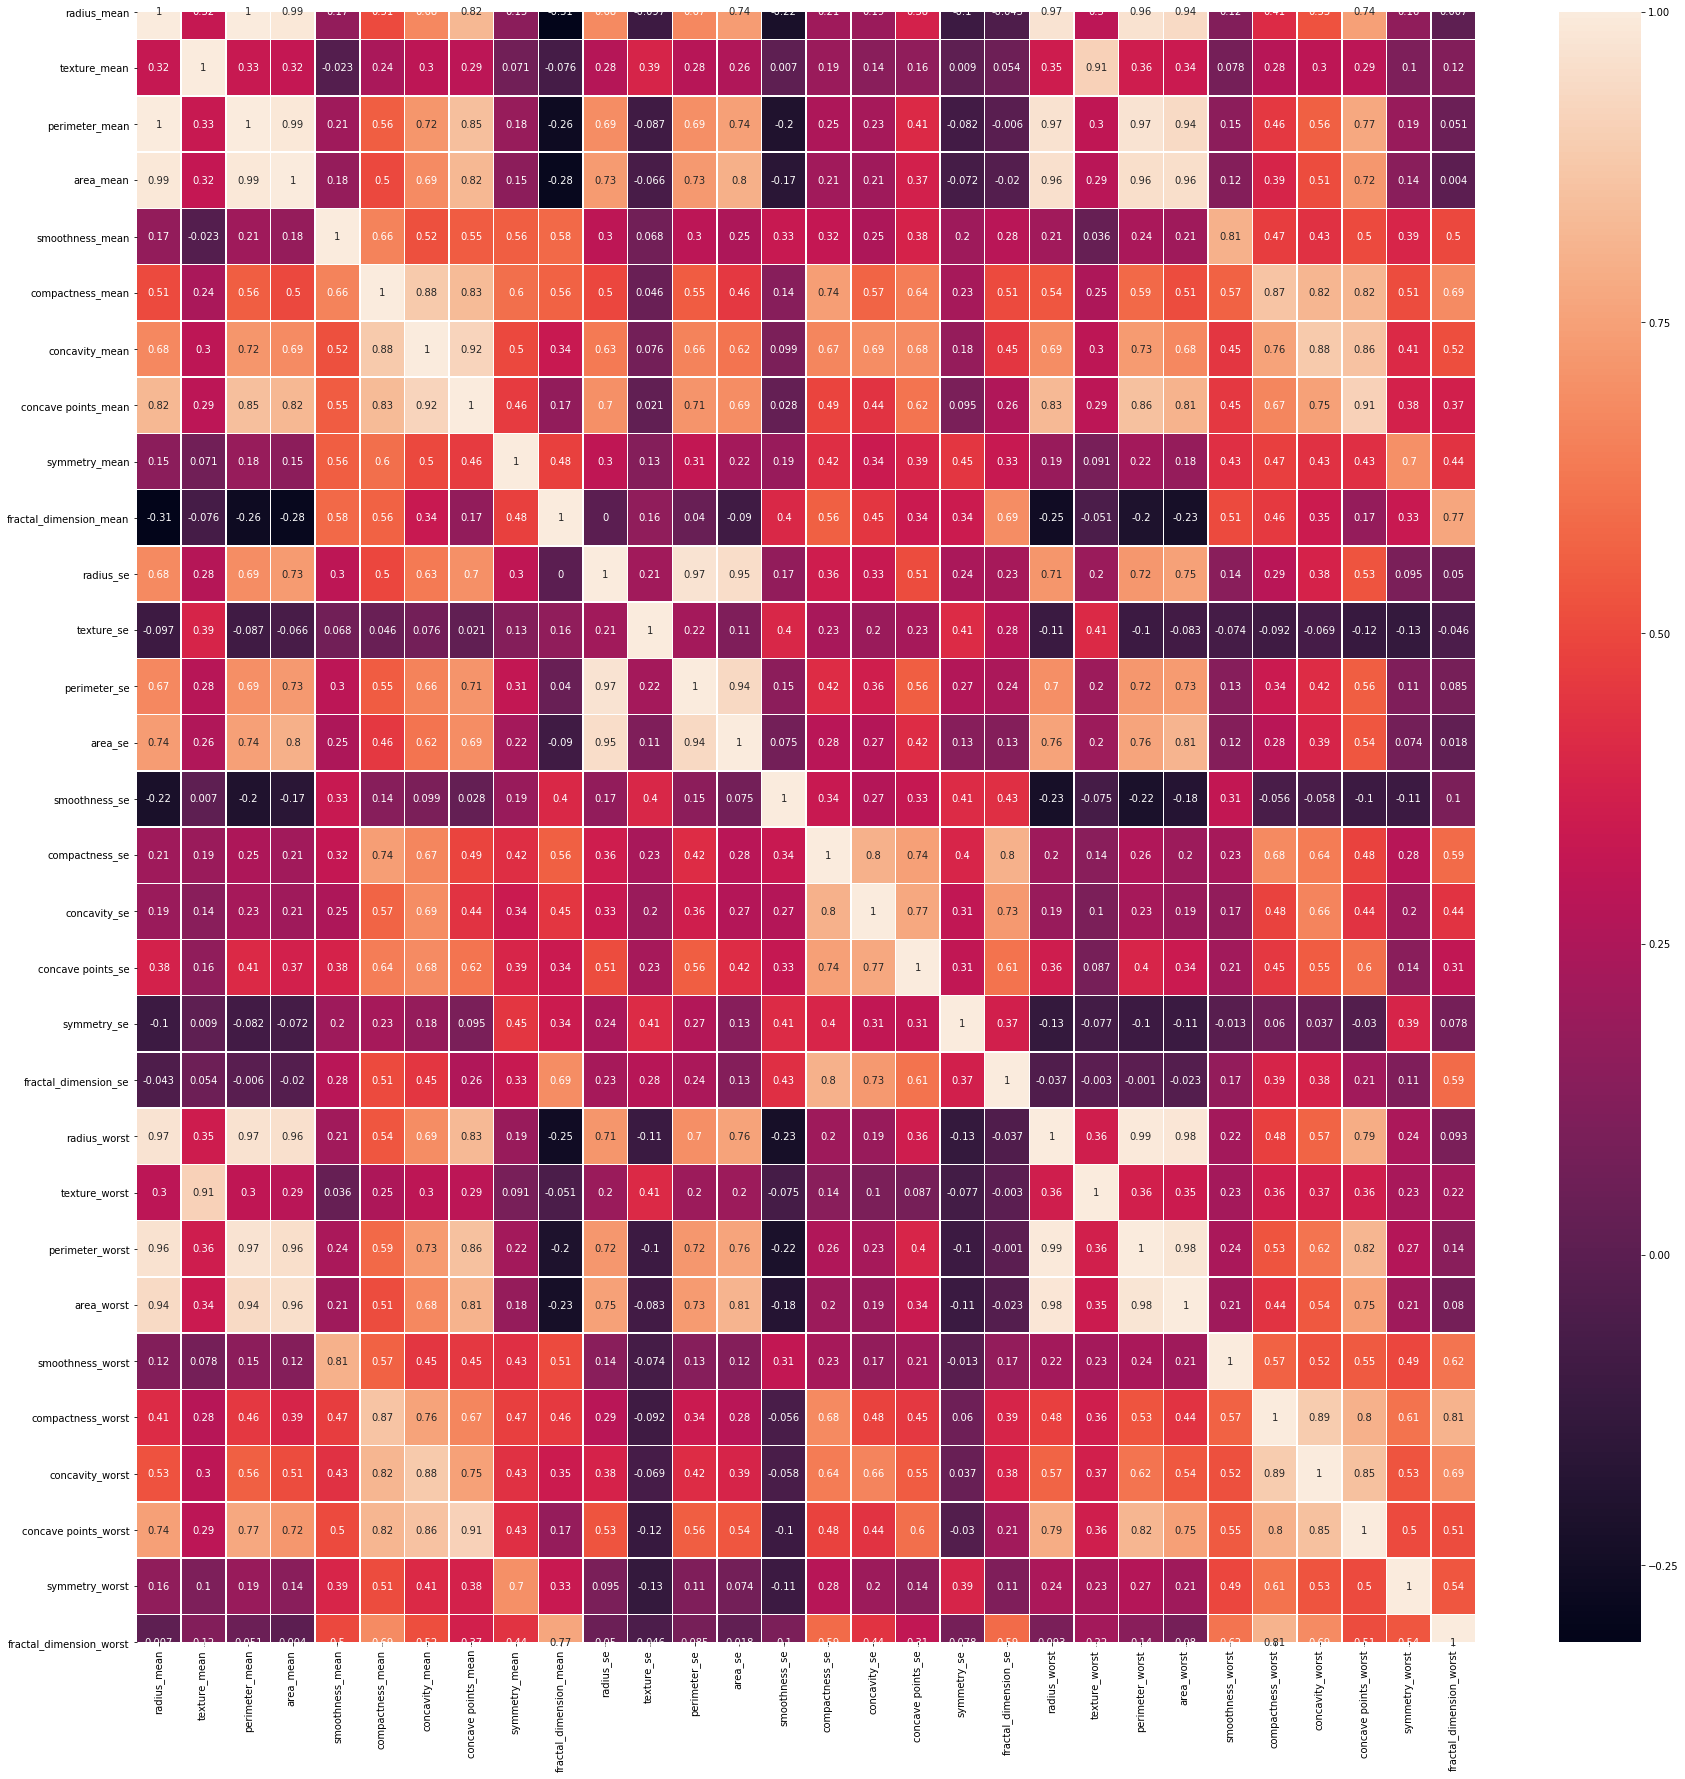

In [127]:
plt.figure(figsize=(30,30))
sns.heatmap(round(cancer_data.corr(), 3), linewidth = 0.5, annot= True)

In [134]:
cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


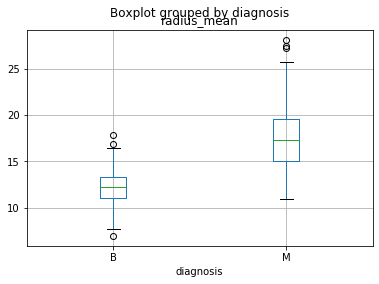

In [137]:
cancer_data.boxplot(column = 'radius_mean', by = 'diagnosis')

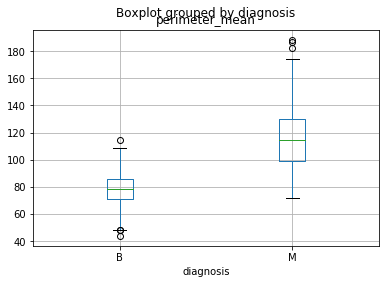

In [138]:
cancer_data.boxplot(column = 'perimeter_mean', by = 'diagnosis')

## Data Modelling

In [111]:
#splitting the dependent and independent variables
X = cancer_data.iloc[:, 1:]
Y = cancer_data.iloc[:, 0]

In [116]:
# a function which takes in independent variables, dependent variables and Machine learning Model which returns the model
#evaluation metrics and feature importance.
def model(X,Y,clf, clf_name, f_i = True, lo_re = False):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X ,Y ,test_size = 0.3, stratify = cancer_data.iloc[:, 0], random_state = 555)
    
    clfit     = clf.fit(X_train, Y_train)
    predicted = clfit.predict(X_test)
    
    accuracy  = round(accuracy_score(Y_test, predicted),4)*100
    con_mat   = confusion_matrix(Y_test, predicted)
    
    print(clf_name + ":\n\n" + "Accuracy Score : " + str(accuracy) + "%")
    print("\nConfusion Matrix : \n" + str(con_mat))
    
    if f_i:
        importance  = clfit.feature_importances_
    elif lo_re :
        importance = clfit.coef_
    
    importance = importance[0]
    sort_index = np.argsort(importance)

    coeffi = clfit.coef_.flatten()
    coeffi_index = np.argsort(coeffi)
    
    plt.figure(figsize=(10,10))
    plt.title('Coefficients Of ' + clf_name)
    plt.barh(range(len(coeffi)), coeffi[coeffi_index], align='center')
    plt.yticks(np.arange(len(x_train.columns)), x_train.columns[coeffi_index])
    
    plot_confusion_matrix(model_LR, x_test, y_test, normalize= 'true')
    plt.title("Confusion Matrix")
    
    plt.tight_layout()
    plt.show()

Logistic Regression:

Accuracy Score : 94.15%

Confusion Matrix : 
[[103   4]
 [  6  58]]


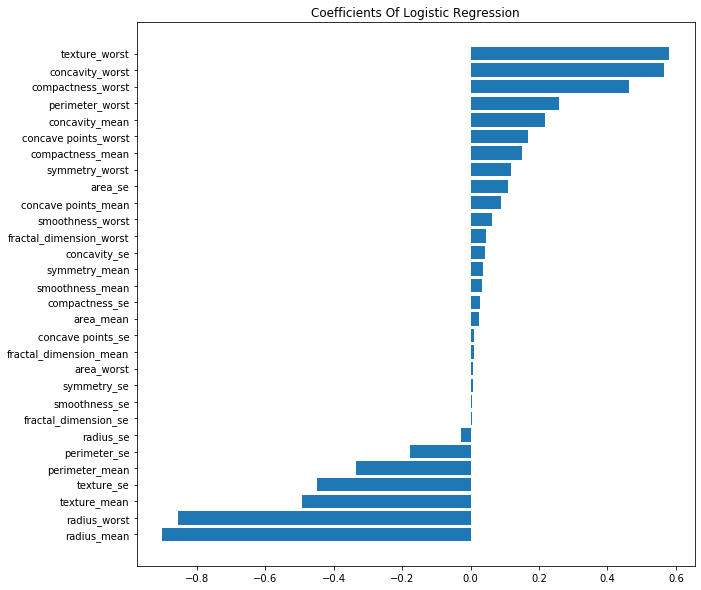

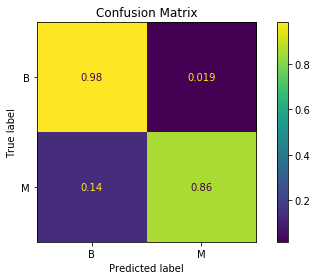

In [117]:
#Building a Logistic regression Model to classify
model(X, Y, LogisticRegression(), "Logistic Regression", f_i = False, lo_re = True)

In [125]:
#Performing k_fold cross validation as there are very few records in the dataset.
#this functions takes in the data, the model and number of splits to return model metrics such as Accuracy, Specificity 
#and sensitivity.
def CV(data, clf, clf_name, n_splits = 5):
    
    print(clf_name)
    
    c_v = KFold(n_splits= n_splits)

    accuracy = []
    sensitivity = []
    specificity = []
    auc_score = []

    for train_split, test_split in c_v.split(data):
    
        train_set = data.iloc[train_split]
        test_set = data.iloc[test_split]
    
        clf.fit(train_set.iloc[:, 1:], train_set.iloc[:, 0])
        pred_val = clf.predict(test_set.iloc[:, 1: ])
    
        tp, fp, fn, tn = confusion_matrix(test_set.iloc[:, 0], pred_val).ravel()
        specificity.append(tn / (fp + tn))
        accuracy.append((tp + tn ) / (tp + fp + fn + tn))
        sensitivity.append((tp) / (tp + fn))

    print('Mean Accuracy', mean(accuracy) * 100)
    print('Mean Specificity', mean(specificity) * 100)
    print('Mean Sensitivity:', mean(sensitivity) * 100)
    
    plt.figure(figsize=(10,6))
    plt.plot(range(1, n_splits + 1), accuracy)
    plt.plot(range(1, n_splits + 1), specificity)
    plt.plot(range(1, n_splits + 1), sensitivity)
    plt.xticks(range(1, 6))
    plt.xlabel('Splits')
    plt.ylabel('Score')
    plt.title("CV - Metrics")
    plt.legend(labels = ['accuracy', 'specificity', 'sensitivity'], loc = 'lower right')
    plt.show()

Logistic Regression
Mean Accuracy 94.37820214252444
Mean Specificity 92.8093668783324
Mean Sensitivity: 93.67109884211334


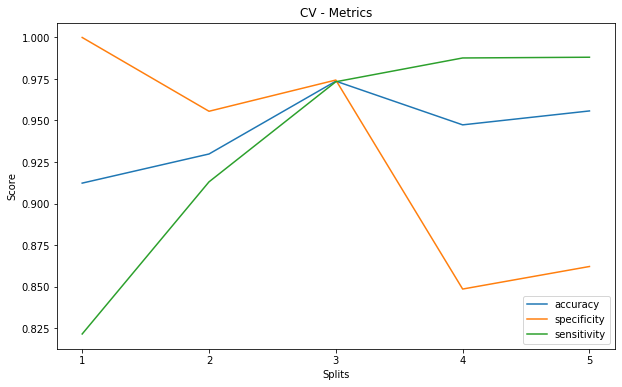

In [126]:
#Implementing 5-fold logistic regression model.
CV(cancer_data, LogisticRegression(), "Logistic Regression", n_splits = 5)

## Feature selection

##### Performing SelectKBest and RFE to select the most important features(subset of independent variables) influencing the model performance.

In [374]:
#Implementing SelectKBest feature importance Techniques.
accuracy_SKB = []
para_SKB = []
for c in range(5, 15):
    chi_SKB = SelectKBest(chi2, k = c)
    cancer_data_chi_SKB = chi_SKB.fit_transform(x_train, y_train)
    true_false_SKB = chi_SKB.get_support()
    indices_SKB = []
    for i, j in enumerate(true_false_SKB):
        if j:
            indices_SKB.append(i)
    
    para = list(x_train.columns[indices_SKB])
    para_SKB.append(para)
    model_LR.fit(cancer_data_chi_SKB, y_train)
    x_test_SKB = x_test.iloc[:, indices_SKB]
    pre = model_LR.predict(x_test_SKB)
    acc = accuracy_score(y_test, pre)
    accuracy_SKB.append(acc)
    index = list(np.arange(5,15,1))
SKB = pd.DataFrame(list(zip(index, para_SKB, accuracy_SKB)),
              columns=['K','parameters', 'accuracy'])

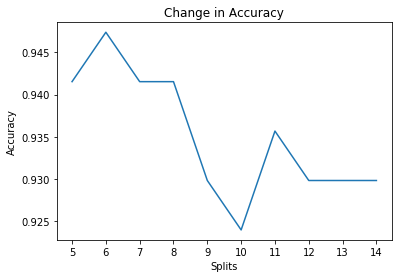

In [305]:
#plotting a line graph to interpret how many important variables are requried to build a model with a similar accuracy.
plt.plot(SKB['K'], SKB['accuracy'])
plt.xticks(SKB['K'])
plt.title("Change in Accuracy")
plt.xlabel("Features")
plt.ylabel("Accuracy")
plt.show()

In [314]:
#Below are the best 6 features which influence the model performance.
SKB[SKB['K'] == 6]['parameters'].tolist()

[['perimeter_mean',
  'area_mean',
  'area_se',
  'radius_worst',
  'perimeter_worst',
  'area_worst']]

In [379]:
#Implementing RFE to select the best features.
accuracy_RFE = []
para_RFE = []
for i in range(5, 15):    
    rfe_df = RFE(model_LR, n_features_to_select = i)
    rfe = rfe_df.fit(x_train, y_train)
    pred = rfe.predict(x_test)
    accuracy_RFE.append(accuracy_score(y_test, pred))
    true_false_RFE = rfe.support_
    k = []
    for x, y in enumerate(true_false_RFE):
        if y:
            k.append(x)
    para = list(x_train.columns[k])
    para_RFE.append(para)
index = list(np.arange(5,15,1))
RFE = pd.DataFrame(list(zip(index, para_RFE, accuracy_RFE)),
              columns=['K','parameters', 'accuracy'])

TypeError: 'DataFrame' object is not callable

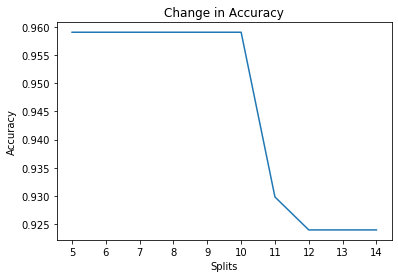

In [306]:
#plotting a line graph to interpret how many important variables are requried to build a model with a similar accuracy.
plt.plot(RFE['K'], RFE['accuracy'])
plt.xticks(RFE['K'])
plt.title("Change in Accuracy")
plt.xlabel("Features")
plt.ylabel("Accuracy")
plt.show()

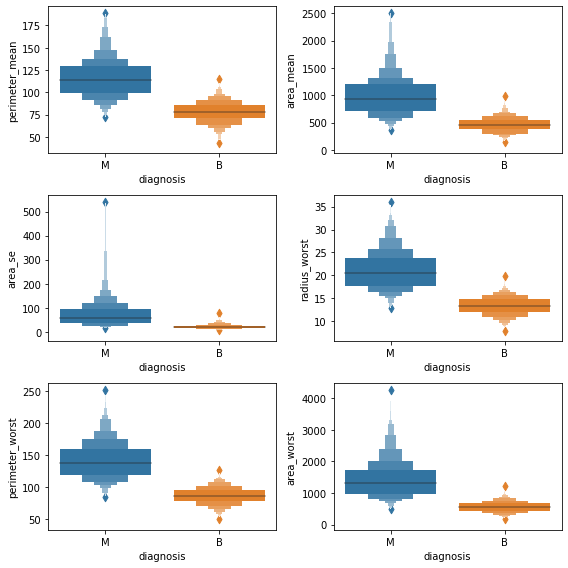

In [368]:
#from the above feature selction methods it is shown that higher accuracy can be achieved with 
#just 6 features out of given 31 features

#Here from the boxplots it can be seen that what and how both the tumors can be differentiated.
#Malignant has  a higher value range compared to benign which has a lower value range as from the domain knowledge we know
#that malignant spreads to different tissues whereas benign does not spread to different tissues.

fig,axes = plt.subplots(3,2, figsize = (8, 8))
sns.boxenplot(cancer_data['diagnosis'], cancer_data['perimeter_mean'], ax=axes[0,0])
sns.boxenplot(cancer_data['diagnosis'], cancer_data['area_mean'],ax=axes[0,1])
sns.boxenplot(cancer_data['diagnosis'], cancer_data['area_se'],ax=axes[1,0])
sns.boxenplot(cancer_data['diagnosis'], cancer_data['radius_worst'],ax=axes[1,1])
sns.boxenplot(cancer_data['diagnosis'], cancer_data['perimeter_worst'],ax=axes[2,0])
sns.boxenplot(cancer_data['diagnosis'], cancer_data['area_worst'],ax=axes[2,1])
plt.tight_layout()
plt.show()

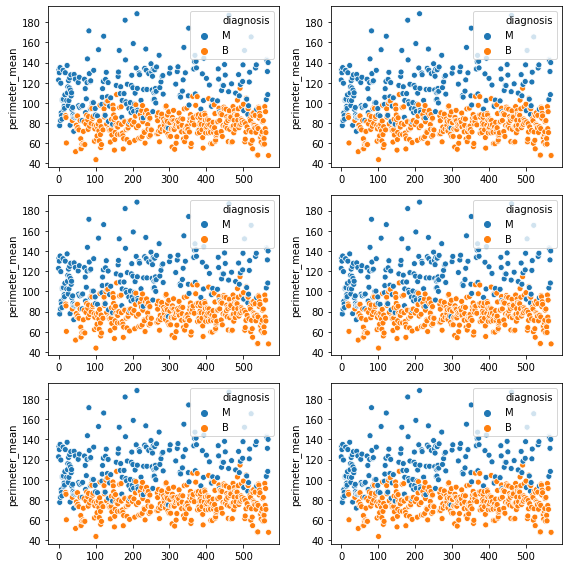

In [370]:
#From the below scatterplots it is more clear that Malignant has high spread and benign has low spread to other tissues.

fig,axes = plt.subplots(3,2, figsize = (8, 8))
sns.scatterplot(range(len(cancer_data['perimeter_mean'])), cancer_data['perimeter_mean'], hue = cancer_data['diagnosis'],ax=axes[0,0])
sns.scatterplot(range(len(cancer_data['area_mean'])), cancer_data['perimeter_mean'], hue = cancer_data['diagnosis'],ax=axes[0,1])
sns.scatterplot(range(len(cancer_data['area_se'])), cancer_data['perimeter_mean'], hue = cancer_data['diagnosis'],ax=axes[1,0])
sns.scatterplot(range(len(cancer_data['radius_worst'])), cancer_data['perimeter_mean'], hue = cancer_data['diagnosis'],ax=axes[1,1])
sns.scatterplot(range(len(cancer_data['perimeter_worst'])), cancer_data['perimeter_mean'], hue = cancer_data['diagnosis'],ax=axes[2,0])
sns.scatterplot(range(len(cancer_data['area_worst'])), cancer_data['perimeter_mean'], hue = cancer_data['diagnosis'],ax=axes[2,1])
plt.tight_layout()
plt.show()